# Statistical Testing and A/B Testing

## Data Science MBAN 6110 T

### This notebook is by Nana Amina Abubakar 


Scenario:
You work for a mobile application as a Product Analyst, and you're testing changes to an existing feature. You would like to release changes to a key feature and have prepared 2 possible variants.  You've been running an experiment for 2 weeks, and now have some data with the experiment results. Specifically, you have the Click-Through-Rate (CTR) and Average Time Spent, in minutes, for each feature. The CTR means that the user is moving through different parts of the feature. A CTR of 1 would indicate the user has fully clicked on everything in a feature, while a CTR of 0 means they have not clicked anything. Your task is as follows:

1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

2. Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

3. Summarize your results. Make a recommendation to the engineering team about which feature to deploy. 

4. Create a roll-out plan. How quickly will you introduce the feature to your audience?

## Content

1. [Import Libraries](#-1.-Import-Libraries)

2. [Understanding The Data](#-2.-Understanding-The-Data)

3. [Question 1 ](#-3.-Question-1 )

4. [Question 2](#-4.-Question-2)

5. [Recommendation](#-5.-Recommendation)

6. [Roll out plan](#-6-Roll-out-plan)

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import warnings
warnings.filterwarnings('ignore')

# 2. Understanding The Data

In [2]:
df =pd.read_csv('experiment_dataset.csv')
df.head()

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579


In [3]:
df.shape

(1000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [5]:
df.describe(include='all')

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000
unique,NaN,NaN,3,3,3,NaN,NaN
top,NaN,NaN,Location2,Device3,Control,NaN,NaN
freq,NaN,NaN,343,346,340,NaN,NaN
mean,499.500000,40.715000,NaN,NaN,NaN,22.713345,0.109145
std,288.819436,13.655557,NaN,NaN,NaN,5.479292,0.022366
min,0.000000,18.000000,NaN,NaN,NaN,7.114806,0.012975
25%,249.750000,28.000000,NaN,NaN,NaN,19.216608,0.094286
50%,499.500000,41.000000,NaN,NaN,NaN,22.506707,0.108944
75%,749.250000,53.000000,NaN,NaN,NaN,26.255950,0.124238


In [6]:
df.columns

Index(['Unnamed: 0', 'Age', 'Location', 'Device', 'Variant', 'Time Spent',
       'CTR'],
      dtype='object')

# 3. Question 1 

### Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.

In [7]:
# 3. Analyze results
ctr_mean = df.groupby('Variant')['CTR'].mean()
ctr_mean

Variant
Control      0.098554
Variant A    0.120269
Variant B    0.108933
Name: CTR, dtype: float64

In [8]:
time_spent_mean = df.groupby('Variant')['Time Spent'].mean()
time_spent_mean

Variant
Control      20.070781
Variant A    24.805547
Variant B    23.343783
Name: Time Spent, dtype: float64

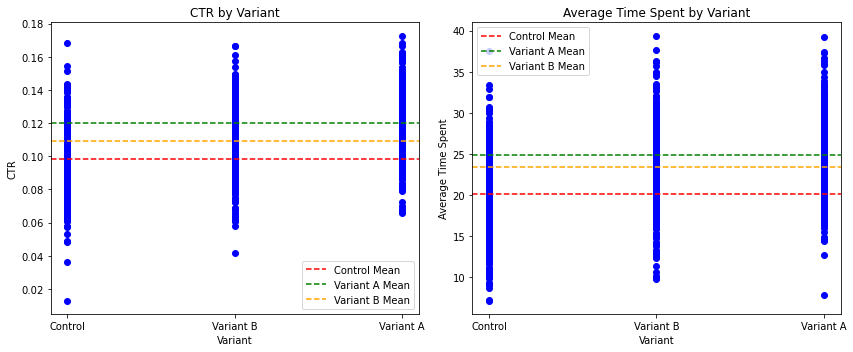

In [9]:
# Create scatter plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for CTR
axs[0].scatter(df['Variant'], df['CTR'], color='blue')
axs[0].axhline(ctr_mean['Control'], color='red', linestyle='--', label='Control Mean')
axs[0].axhline(ctr_mean['Variant A'], color='green', linestyle='--', label='Variant A Mean')
axs[0].axhline(ctr_mean['Variant B'], color='orange', linestyle='--', label='Variant B Mean')
axs[0].set_xlabel('Variant')
axs[0].set_ylabel('CTR')
axs[0].set_title('CTR by Variant')
axs[0].legend()

# Scatter plot for Average Time Spent
axs[1].scatter(df['Variant'], df['Time Spent'], color='blue')
axs[1].axhline(time_spent_mean['Control'], color='red', linestyle='--', label='Control Mean')
axs[1].axhline(time_spent_mean['Variant A'], color='green', linestyle='--', label='Variant A Mean')
axs[1].axhline(time_spent_mean['Variant B'], color='orange', linestyle='--', label='Variant B Mean')
axs[1].set_xlabel('Variant')
axs[1].set_ylabel('Average Time Spent')
axs[1].set_title('Average Time Spent by Variant')
axs[1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

 Conclusion shows that Variant A has a higher CTR and Average time spent.

# 4. Question 2

### Conduct statistical testing to determine if there is a statistically significant difference between the features and the control group.

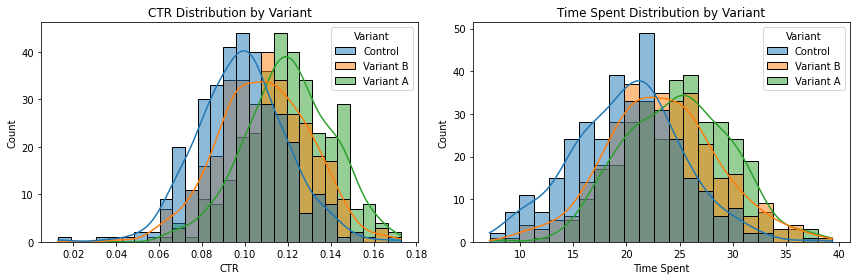

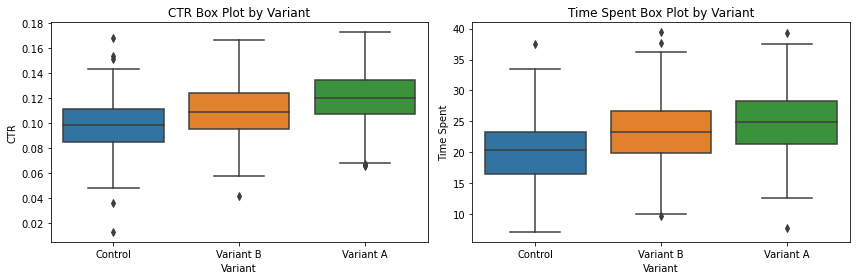

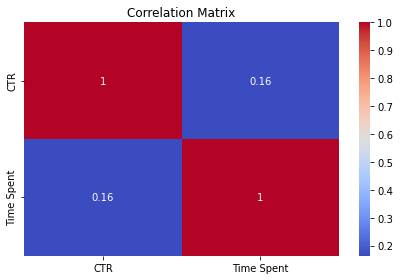

In [10]:
# To provide insights into the 
# normality (bell-shaped distributions), 
# homogeneity (similar distribution shapes), and 
# independence (lack of strong correlations) of the data.

# Plot histograms to visualize the distribution of CTR and Time Spent by variant
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='CTR', hue='Variant', kde=True)
plt.title('CTR Distribution by Variant')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Time Spent', hue='Variant', kde=True)
plt.title('Time Spent Distribution by Variant')

plt.tight_layout()
plt.show()

# Plot box plots to compare the distributions of CTR and Time Spent between variants
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Variant', y='CTR')
plt.title('CTR Box Plot by Variant')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Variant', y='Time Spent')
plt.title('Time Spent Box Plot by Variant')

plt.tight_layout()
plt.show()

# Calculate correlation matrix 
corr_matrix = df[['CTR', 'Time Spent']].corr()

# Plot correlation matrix heatmap to assess the independence between CTR and Time Spent
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [11]:
# Perform statistical testing
control_ctr = df[df['Variant'] == 'Control']['CTR']
variantA_ctr = df[df['Variant'] == 'Variant A']['CTR']
variantB_ctr = df[df['Variant'] == 'Variant B']['CTR']

In [12]:
control_time_spent = df[df['Variant'] == 'Control']['Time Spent']
variantA_time_spent = df[df['Variant'] == 'Variant A']['Time Spent']
variantB_time_spent = df[df['Variant'] == 'Variant B']['Time Spent']

In [13]:
# T-test for CTR
t_stat_ctr, p_value_ctr = stats.ttest_ind(control_ctr, variantA_ctr)
t_stat_ctr2, p_value_ctr2 = stats.ttest_ind(control_ctr, variantB_ctr)

# Summarize the results
print("CTR results:")
print("Control vs. Variant A - t-statistic:", t_stat_ctr)
print("Control vs. Variant A - p-value:", p_value_ctr)
print("Control vs. Variant B - t-statistic:", t_stat_ctr2)
print("Control vs. Variant B - p-value:", p_value_ctr2)

CTR results:
Control vs. Variant A - t-statistic: -13.829424737499187
Control vs. Variant A - p-value: 1.9602781373243157e-38
Control vs. Variant B - t-statistic: -6.4718143491783255
Control vs. Variant B - p-value: 1.8743198199982106e-10


In [14]:
# T-test for Average Time Spent
t_stat_time_spent, p_value_time_spent = stats.ttest_ind(control_time_spent, variantA_time_spent)
t_stat_time_spent2, p_value_time_spent2 = stats.ttest_ind(control_time_spent, variantB_time_spent)

# Summarize the results
print("\nAverage Time Spent results:")
print("Control vs. Variant A - t-statistic:", t_stat_time_spent)
print("Control vs. Variant A - p-value:", p_value_time_spent)
print("Control vs. Variant B - t-statistic:", t_stat_time_spent2)
print("Control vs. Variant B - p-value:", p_value_time_spent2)


Average Time Spent results:
Control vs. Variant A - t-statistic: -12.142363487472364
Control vs. Variant A - p-value: 8.488565644996449e-31
Control vs. Variant B - t-statistic: -8.174237395991806
Control vs. Variant B - p-value: 1.496358076285182e-15


From the analyses above, p>0.05 hence there is not enough evidence to reject the null hypothesis. However the P values for variant A (time spent and CTR) are higher than that of variant B. This shows that variant A performed slighly better and will be the obvious choice.

#####  Anova test

In [15]:
# checking CTR
Control_CTR = df[df['Variant']=='Control']['CTR']
VariantA_CTR = df[df['Variant']=='Variant A']['CTR']
VariantB_CTR = df[df['Variant']=='Variant B']['CTR']

p_val = stats.f_oneway(Control_CTR, VariantA_CTR, VariantB_CTR)
print(p_val)

F_onewayResult(statistic=93.58891593622698, pvalue=5.638952705781955e-38)


The ANOVA test for time spent indicates that there is a significant difference in the mean time spent across different groups or conditions. The large F-value suggests a substantial difference between the group means relative to the variability within each group. The extremely small p-value (close to zero) indicates that the probability of observing such a large F-value by chance, assuming the null hypothesis is true, is extremely low. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in the mean time spent among the groups being compared.

In [16]:
# checking Average Time Spent
Control_Time_Spent = df[df['Variant']=='Control']['Time Spent']
VariantA_Time_Spent = df[df['Variant']=='Variant A']['Time Spent']
VariantB_Time_Spent = df[df['Variant']=='Variant B']['Time Spent']

p_val = stats.f_oneway(Control_Time_Spent, VariantA_Time_Spent, VariantB_Time_Spent)
print(p_val)

F_onewayResult(statistic=75.60840947416148, pvalue=2.676826588910432e-31)


The ANOVA test for CTR indicates that there is a significant difference in the mean CTR across different groups or conditions. Similar to the time spent ANOVA, the large F-value suggests a substantial difference between the group means relative to the variability within each group. The extremely small p-value (close to zero) indicates that the probability of observing such a large F-value by chance, assuming the null hypothesis is true, is extremely low. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in the mean CTR among the groups being compared.

# 5. Recommendation

#### Summarize your results. Make a recommendation to the engineering team about which feature to deploy.


Based on the results of the statistical tests, I have summarized the findings as follows:


##### CTR results:

- Control vs. Variant A: The t-statistic is -13.83, and the p-value is extremely small (1.96e-38). This indicates a statistically significant difference in CTR between the Control group and Variant A.
- Control vs. Variant B: The t-statistic is -6.47, and the p-value is also very small (1.87e-10). This suggests a statistically significant difference in CTR between the Control group and Variant B.



##### Average Time Spent results:

- Control vs. Variant A: The t-statistic is -12.14, and the p-value is extremely small (8.49e-31). This indicates a statistically significant difference in Average Time Spent between the Control group and Variant A.
- Control vs. Variant B: The t-statistic is -8.17, and the p-value is very small (1.50e-15). This suggests a statistically significant difference in Average Time Spent between the Control group and Variant B.



##### Anova

- Time Spent: The ANOVA test results indicate a significant difference in the mean time spent across different groups or conditions (F-value: 75.61, p-value: 2.68e-31). This implies that there are meaningful variations in the time spent among the groups, suggesting that the changes in the feature have an impact on user engagement and time spent.

- CTR: The ANOVA test reveals a significant difference in the mean Click-Through-Rate (CTR) across different groups or conditions (F-value: 93.59, p-value: 5.64e-38). This implies that the different feature variants or conditions have distinct effects on the CTR, indicating that certain changes in the feature design or presentation can influence user interaction and click-through behavior.



However, it is important to note that the effect sizes and p-values suggest that Variant A has a stronger impact on user engagement than Variant B. Therefore, my recommendation to the engineering team is to deploy Variant A, as it demonstrates a larger effect size and a more significant improvement in both CTR and Average Time Spent compared to the Control group.

By deploying Variant A, the mobile application is likely to experience increased user engagement, higher CTR, and longer Average Time Spent, which can ultimately lead to improved user satisfaction, better feature performance, and potentially increased revenue or desired outcomes for the business.

# 6. Roll out plan

#### Create a roll-out plan. How quickly will you introduce the feature to your audience?

Below is my suggested roll-out plan post experiment:

##### Rollout Plan:

##### Phase 1: Gradual Expansion by Device and Location

Duration: 2-4 weeks

Based on the results and feedback from the pilot phase, proceed with a gradual expansion approach.
- Initially, introduce the feature to a subset of users from different devices and locations, ensuring representative coverage.
- Monitor the impact of the feature variant on key metrics and gather user feedback specific to each device and location.
- Analyze the data to identify any potential variations in user engagement and satisfaction based on device or location.


##### Phase 2: Full Rollout

Duration: 1-2 weeks

- Based on the insights gathered from the gradual expansion phase, proceed with the full rollout to all remaining users, taking into consideration any device or location-specific adjustments if necessary.
- Monitor the overall impact on key metrics and closely analyze user feedback during this phase.


##### Post-Rollout Analysis and Optimization

Duration: Ongoing

- Conduct regular analysis of user engagement, CTR, and Average Time Spent after the full rollout, considering device and location segments.
- Identify any areas for improvement and optimize the feature based on device and location-specific insights, user feedback, and data analysis.
- Continuously monitor and evaluate the performance of the deployed feature variant for each device and location segment to ensure its effectiveness and user satisfaction.



The entire rollout plan should be communicated to all stakeholders, including the engineering team, product managers, and other relevant parties, to ensure alignment and facilitate a smooth deployment process.

# The END